# Simulation d'un mouvement brownien

Dans ce notebook, on simule un mouvement brownien.

In [11]:
from math import sqrt
from scipy.stats import norm
import numpy as np

def brownian(x0, n, dt, delta):
    """
    Génère une instance d'un mouvement brownien unidimensionnel
    Génère de manière rapide en générant tous les échantillons d'une
    Gaussienne directement puis en les sommant. 
    
    Arguments:
    x0 : condition initiale
    n : nombre d'éléments
    dt : le pas de temps
    delta : la "vitesse" du BM
    """
    
    x0 = np.asarray(x0)
    
    # Pour chaque élément de x0, générer un n-échantillion
    # d'une distribution gaussienne
    r = norm.rvs(size = x0.shape + (n,), scale = delta * sqrt(dt))
    
    # Initialisation du vecteur de sortie
    out = np.empty(r.shape)
    
    # Calcul du BM en calculant les sommes cumulées
    np.cumsum(r, axis = -1, out = out)
    
    # Ajout des conditions initiales
    out += np.expand_dims(x0, axis = -1)
    
    return out

In [51]:
import matplotlib.pyplot as plt
import random

def plot_bm_trajectory(trajectory):
    """
    Affiche le graphe de trajectoires d'un BM
    
    Argument:
    
    trajectory : la (les) trajectoires du BM
    Chaque ligne est supposée être une réalisation.
    """
    
    # Faire un plot ou bien plusieurs selon la dimension.
    if trajectory.ndim == 1:
        length = len(trajectory)
        color = np.random.uniform(0,1,3)
        plt.plot(range(length), trajectory, color = color)
    else:
        n_paths, length = trajectory.shape
        for i in range(n_paths):
            color = np.random.uniform(0,1, 3)
            plt.plot(range(length), trajectory[i,:], color = color)
           
    return plt

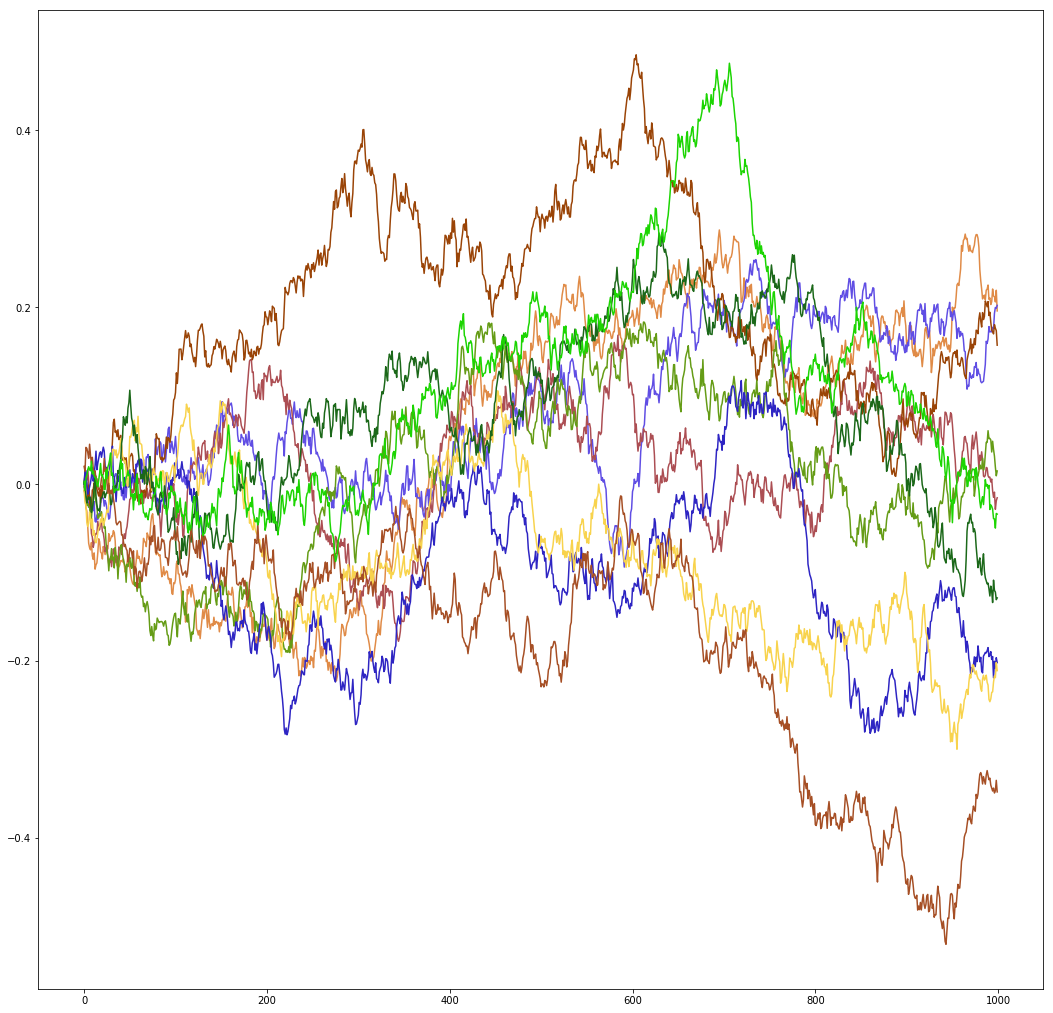

In [91]:
trajectory = brownian(np.zeros(10), 1000, 1, 0.01)
plot_bm_trajectory(trajectory)
plt.show()

In [92]:
import matplotlib.pyplot as plt
import random

def plot_2D_bm_trajectory(trajectory, kwargs):
    """
    Affiche le graphe de trajectoires d'un BM
    
    Argument:
    
    trajectory : la (les) trajectoires du BM
    Chaque ligne est supposée être une réalisation.
    """
    
    color = np.random.uniform(0,1,3)
    plt.plot()
    plt.plot(trajectory[0,:], trajectory[1,:], color = color, **kwargs)
    
    # Starpoint et endopoint
    plt.plot(trajectory[0,0], trajectory[1,0], 'go')
    plt.plot(trajectory[0,-1], trajectory[1,-1], 'ro')
    
           
    return plt

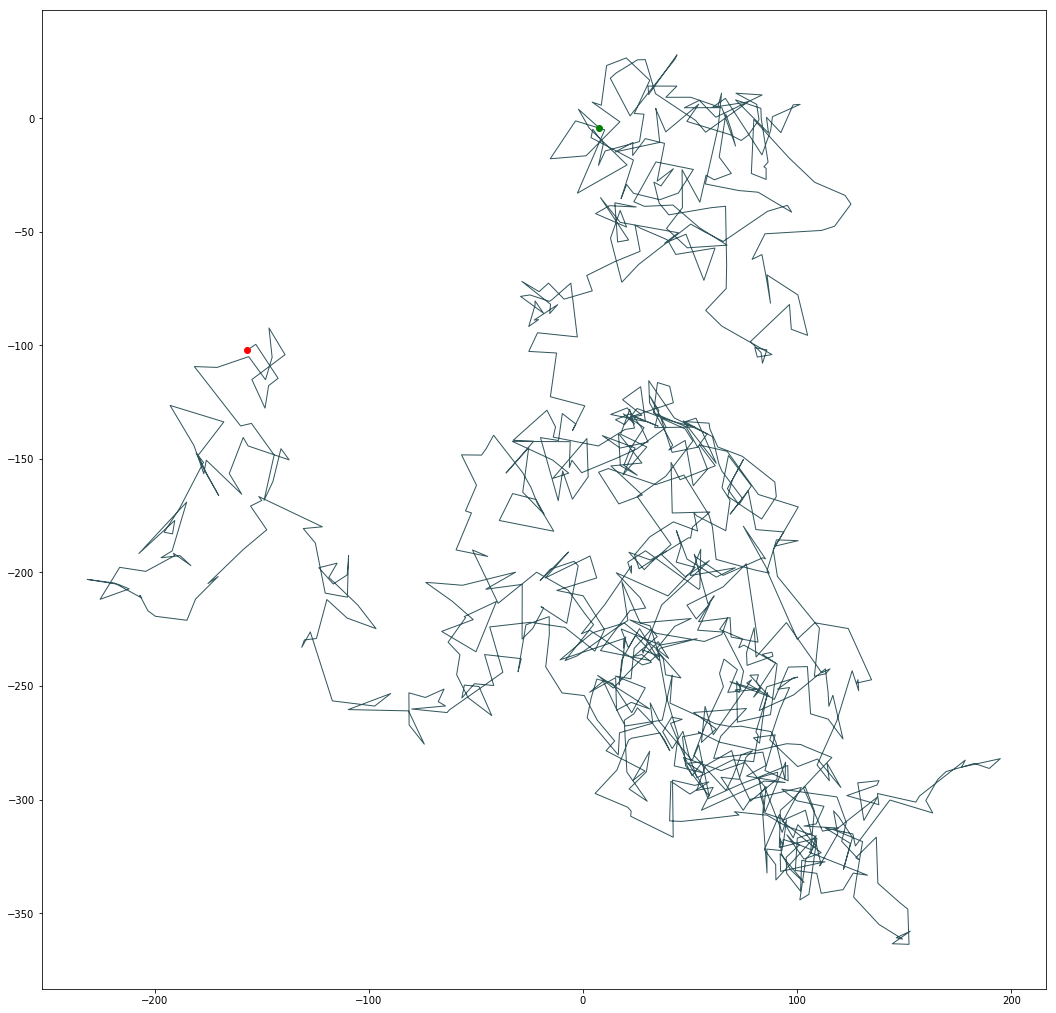

In [93]:
trajectory = brownian(np.zeros(2), 1000, .01, 100)
kwargs = {'linewidth':1}
plot_2D_bm_trajectory(trajectory, kwargs)
plt.rcParams["figure.figsize"] = (18,18)
plt.show()